In [242]:
import numpy as np
import matplotlib.pyplot as plt

In [243]:
%matplotlib notebook

In [244]:
markersize = 10

In [245]:
def getangles(a, o, c, f):
    if c == 0:
        return (a,)
    return (*getangles(a+o,o/f,c-1,f), *getangles(a-o,o/f,c-1,f))

In [246]:
startangle = 0
newangle_degrees = 1
newangle = newangle_degrees*np.pi/180
count = 21
rpercent = 5
rfactor = 1+rpercent/100
Z2 = (np.tan(getangles(startangle,newangle,count,rfactor)))**2
hist = np.histogram(Z2)

In [247]:
Z2fromhist = hist[1][1:]; print(Z2fromhist)
rhofromhist = hist[0]; print(rhofromhist)
norm = np.trapz(rhofromhist,Z2fromhist); print(norm)
rhofromhist = rhofromhist/norm

ikeep = np.nonzero(rhofromhist)
Z2fromhistkeep = Z2fromhist[ikeep]; print(Z2fromhistkeep)
logrhofromhistkeep = np.log(rhofromhist[ikeep]); print(logrhofromhistkeep)
rhofromhistkeep = np.exp(logrhofromhistkeep)

[0.00573034 0.01146068 0.01719102 0.02292136 0.0286517  0.03438204
 0.04011238 0.04584273 0.05157307 0.05730341]
[1762400  241012   66450   19446    5676    1600     426     114      26
       2]
6967.813492133503
[0.00573034 0.01146068 0.01719102 0.02292136 0.0286517  0.03438204
 0.04011238 0.04584273 0.05157307 0.05730341]
[ 5.53313032  3.54354525  2.25514831  1.02633992 -0.20505471 -1.47129784
 -2.79461741 -4.1128583  -5.59096021 -8.15590957]


<IPython.core.display.Javascript object>


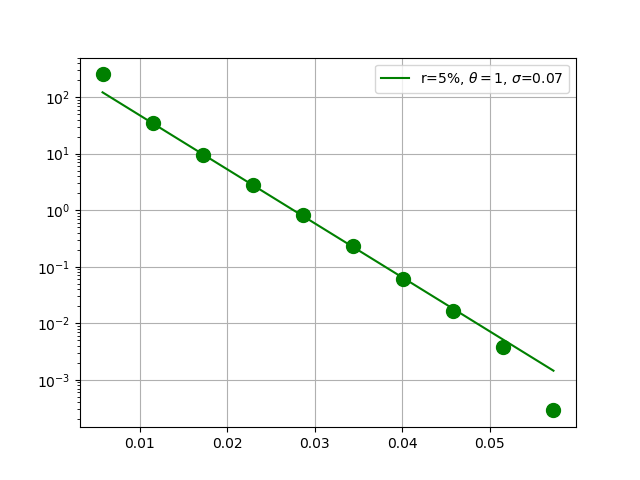

[-219.88992466    6.06254274] predicted sigma =  0.0674368591192241


In [248]:
plt.semilogy(Z2fromhistkeep,rhofromhistkeep,'og',markersize=markersize)
thisrange = [i for i in range(1,7)]
p1 = np.polyfit(Z2fromhistkeep[thisrange],logrhofromhistkeep[thisrange],1)
best_sigma1 = 1/np.sqrt(-p1[0])
print(p1,'predicted sigma = ', best_sigma1)
label_sigma1 = 'r='+str(rpercent)+r'%, $\theta=$'+str(newangle_degrees)+r', $\sigma$='+str(np.round(best_sigma1*100)/100) 
plt.semilogy(Z2fromhistkeep,np.exp(np.polyval(p1,Z2fromhistkeep)),'g', label=label_sigma1)
plt.legend()
plt.grid(True)

In [249]:
thetafromhist = np.arctan(Z2fromhist**.5)*180/np.pi
print(thetafromhist)

[ 4.32897776  6.11050256  7.46970021  8.60908796  9.60728575 10.50470351
 11.32539957 12.08508414 12.79469405 13.46221034]
